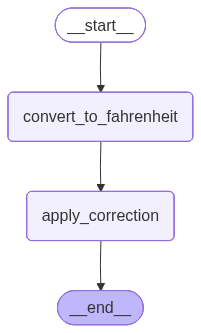

In [1]:
from typing_extensions import TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

class TempState(TypedDict):
    celsius: float

class InternalState(TypedDict):
    fahrenheit: float

def convert_to_fahrenheit(state: TempState) -> InternalState:
    print("---Node 1: Convert to Fahrenheit---")
    fahrenheit = (state['celsius'] * 9/5) + 32
    return {"fahrenheit": fahrenheit}

def apply_correction(state: InternalState) -> TempState:
    print("---Node 2: Apply Correction---")
    corrected_temp = (state['fahrenheit'] - 32) * 5/9 + 1  # adds +1°C correction
    return {"celsius": corrected_temp}

builder = StateGraph(TempState)
builder.add_node("convert_to_fahrenheit", convert_to_fahrenheit)
builder.add_node("apply_correction", apply_correction)

builder.add_edge(START, "convert_to_fahrenheit")
builder.add_edge("convert_to_fahrenheit", "apply_correction")
builder.add_edge("apply_correction", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))


In [3]:
graph.invoke({"celsius":35.5})

---Node 1: Convert to Fahrenheit---
---Node 2: Apply Correction---


{'celsius': 36.5}

In [ ]:
from typing_extensions import TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

class InputState(TypedDict):
    destination: str

class OutputState(TypedDict):
    message: str

class OverallState(TypedDict):
    destination: str
    note: str
    message: str

# Nodes
def info_node(state: InputState):
    print("---Info Node---")
    note = f"{state['destination']} is known for its culture and food."
    return {"note": note, "message": "Processing..."}

def message_node(state: OverallState) -> OutputState:
    print("---Message Node---")
    return {"message": f"Enjoy your trip to {state['destination']}!"}

# Build graph
graph = StateGraph(OverallState, input_schema=InputState, output_schema=OutputState)
graph.add_node("info_node", info_node)
graph.add_node("message_node", message_node)
graph.add_edge(START, "info_node")
graph.add_edge("info_node", "message_node")
graph.add_edge("message_node", END)

# Compile
graph = graph.compile()

# Visualize
display(Image(graph.get_graph().draw_mermaid_png()))

# Test
result = graph.invoke({"destination": "Paris"})
print("\nFinal Output:", result)
